In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# get dataset dari public link drive ku (ga perlu mount/akun)
!pip install gdown

file_id = '1cXASsh88T1kqOfXAPRKhC2CxqxjUnUvI'
url = f'https://drive.google.com/uc?id={file_id}'
output_filename = 'SpamEmailClassificationDataset.csv'

!gdown --id {file_id} --output {output_filename}

In [7]:
import pandas as pd

df = pd.read_csv('SpamEmailClassificationDataset.csv')
df

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


# **Data Pre-Processing**

In [8]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
df.dtypes

label     int64
text     object
dtype: object

In [10]:
df.loc[df['label'] == 'spam', 'label',] = 0
df.loc[df['label'] == 'ham', 'label',] = 1

In [11]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [12]:
X = df['text']

Y = df['label']

In [13]:
X

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life ! viagra has helped m...
Name: text, Length: 83448, dtype: object

In [14]:
Y

0        1
1        1
2        0
3        1
4        0
        ..
83443    0
83444    1
83445    1
83446    0
83447    1
Name: label, Length: 83448, dtype: int64

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [16]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(83448,)
(66758,)
(16690,)


In [17]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [18]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [19]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# **Model Training, Testing & Evaluation**

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**DECISION TREE**

In [21]:
dtrees = DecisionTreeClassifier()
dtrees.fit(X_train_features, Y_train)

dt_train = dtrees.predict(X_train_features)
dt_test = dtrees.predict(X_test_features)

dt_train_acc = accuracy_score(Y_train, dt_train)
dt_test_acc = accuracy_score(Y_test, dt_test)

dt_precision = precision_score(Y_test, dt_test)
dt_recall = recall_score(Y_test, dt_test)
dt_f1 = f1_score(Y_test, dt_test)


print("Decision Tress:\n")
print("Training Data Accuracy:", dt_train_acc)
print("Testing Data Accuracy :", dt_test_acc)

print("Precision             :", dt_precision)
print("Recall                :", dt_recall)
print("F1 Score              :", dt_f1)

Decision Tress:

Training Data Accuracy: 0.9998651846969652
Testing Data Accuracy : 0.9645296584781307
Precision             : 0.9653068143293028
Recall                : 0.9677126996714626
F1 Score              : 0.9665082597872822


**Logistic Regression**

In [22]:
lr = LogisticRegression()
lr.fit(X_train_features, Y_train)

lr_train = lr.predict(X_train_features)
lr_test = lr.predict(X_test_features)

lr_train_acc = accuracy_score(Y_train, lr_train)
lr_test_acc = accuracy_score(Y_test, lr_test)

lr_precision = precision_score(Y_test, lr_test)
lr_recall = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)


print("Logistic Regression:\n")
print("Training Data Accuracy:", lr_train_acc)
print("Testing Data Accuracy :", lr_test_acc)

print("Precision             :", lr_precision)
print("Recall                :", lr_recall)
print("F1 Score              :", lr_f1)

Logistic Regression:

Training Data Accuracy: 0.9895443242757422
Testing Data Accuracy : 0.984661473936489
Precision             : 0.9775994650618522
Recall                : 0.9937691174804577
F1 Score              : 0.9856179775280899


**KNN**

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train_features, Y_train)

knn_train = knn.predict(X_train_features)
knn_test = knn.predict(X_test_features)

knn_train_acc = accuracy_score(Y_train, knn_train)
knn_test_acc = accuracy_score(Y_test, knn_test)

knn_precision = precision_score(Y_test, knn_test)
knn_recall = recall_score(Y_test, knn_test)
knn_f1 = f1_score(Y_test, knn_test)


print("K Nearest Neighbors:\n")
print("Training Data Accuracy:", knn_train_acc)
print("Testing Data Accuracy :", knn_test_acc)

print("Precision             :", knn_precision)
print("Recall                :", knn_recall)
print("F1 Score              :", knn_f1)

K Nearest Neighbors:

Training Data Accuracy: 0.8629827136822553
Testing Data Accuracy : 0.8104254044337927
Precision             : 0.7405079419009598
Recall                : 0.987651523733998
F1 Score              : 0.8464077669902913


**RANDOM FOREST**

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train_features, Y_train)

rf_train = rf.predict(X_train_features)
rf_test = rf.predict(X_test_features)

rf_train_acc = accuracy_score(Y_train, rf_train)
rf_test_acc = accuracy_score(Y_test, rf_test)

rf_precision = precision_score(Y_test, rf_test)
rf_recall = recall_score(Y_test, rf_test)
rf_f1 = f1_score(Y_test, rf_test)


print("Random Forest:\n")
print("Training Data Accuracy:", rf_train_acc)
print("Testing Data Accuracy :", rf_test_acc)

print("Precision             :", rf_precision)
print("Recall                :", rf_recall)
print("F1 Score              :", rf_f1)

Random Forest:

Training Data Accuracy: 0.9998651846969652
Testing Data Accuracy : 0.9837028160575195
Precision             : 0.987575515787074
Recall                : 0.9815339299875382
F1 Score              : 0.9845454545454545


# **Stacking Model**

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [26]:
estimators = [ ('dtree', dtrees),('lr', lr), ('rf', rf) ] #('knn', knn),
stack = StackingClassifier(estimators, final_estimator = SVC(kernel='linear'))
stack.fit(X_train_features, Y_train)

stack_train = stack.predict(X_train_features)
stack_test = stack.predict(X_test_features)

stack_train_acc = accuracy_score(Y_train, stack_train)
stack_test_acc = accuracy_score(Y_test, stack_test)

stack_precision = precision_score(Y_test, stack_test)
stack_recall = recall_score(Y_test, stack_test)
stack_f1 = f1_score(Y_test, stack_test)


print("Stacking Classifier:\n")
print("Training Data Accuracy:", stack_train_acc)
print("Testing Data Accuracy :", stack_test_acc)

print("Precision             :", stack_precision)
print("Recall                :", stack_recall)
print("F1 Score              :", stack_f1)

Stacking Classifier:

Training Data Accuracy: 0.9988016417508014
Testing Data Accuracy : 0.9881366087477531
Precision             : 0.9866892272983644
Recall                : 0.990936898153393
F1 Score              : 0.988808501017409


# **Metrics Visualization**

In [30]:
train_acc_list = {"LR":lr_train_acc,
                  "DT":dt_train_acc,
                  "KNN":knn_train_acc,
                  "RF":rf_train_acc}

test_acc_list = {"LR":lr_test_acc,
                  "DT":dt_test_acc,
                  "KNN":knn_test_acc,
                  "RF":rf_test_acc}

precision_list = {"LR":lr_precision,
                  "DT":dt_precision,
                  "KNN":knn_precision,
                  "RF":rf_precision}

recall_list = {"LR":lr_recall,
               "DT":dt_recall,
               "KNN":knn_recall,
               "RF":rf_recall}

f1_list = {"LR":lr_f1,
               "DT":dt_f1,
               "KNN":knn_f1,
               "RF":rf_f1}

In [31]:
a1 =  pd.DataFrame.from_dict(train_acc_list, orient = 'index', columns = ["Traning Accuracy"])
a2 =  pd.DataFrame.from_dict(test_acc_list, orient = 'index', columns = ["Testing Accuracy"])
a3 =  pd.DataFrame.from_dict(precision_list, orient = 'index', columns = ["Precision Score"])
a4 =  pd.DataFrame.from_dict(recall_list, orient = 'index', columns = ["Recall Score"])
a5 =  pd.DataFrame.from_dict(f1_list, orient = 'index', columns = ["F1 Score"])

org = pd.concat([a1, a2, a3, a4, a5], axis = 1)
org

,Traning Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score
LR,0.989544,0.984661,0.977599,0.993769,0.985618
DT,0.999865,0.964530,0.965307,0.967713,0.966508
KNN,0.862983,0.810425,0.740508,0.987652,0.846408
RF,0.999865,0.983703,0.987576,0.981534,0.984545


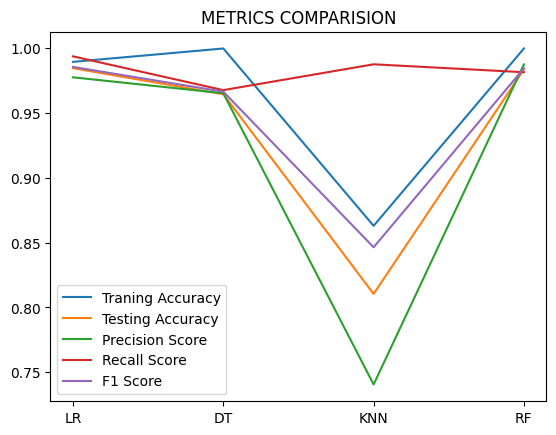

In [32]:
alg = ['LR','DT','KNN','RF']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
plt.plot(alg,a5)
legend = ['Traning Accuracy', 'Testing Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()

In [33]:
input_mail = ["if you want to going out, please hit me up"]

input_mail_features = feature_extraction.transform(input_mail)

prediction = stack.predict(input_mail_features)

if(prediction == 0):
    print("SPAM MAIL")
else:
    print("HAM MAIL")

HAM MAIL
